Maze: [[-100 -100 -100 -100 -100  100 -100 -100 -100 -100]
 [-100   -1   -1   -1   -1   -1   -1   -1   -1 -100]
 [-100   -1 -100 -100 -100   -1 -100 -100   -1 -100]
 [-100   -1   -1   -1 -100   -1   -1   -1   -1   -1]
 [-100 -100 -100   -1 -100   -1 -100   -1 -100   -1]
 [-100   -1   -1   -1   -1   -1 -100   -1 -100 -100]
 [-100 -100 -100 -100   -1 -100 -100   -1   -1   -1]
 [-100 -100   -1   -1   -1   -1   -1   -1 -100   -1]
 [-100   -1 -100   -1 -100   -1 -100   -1   -1   -1]
 [-100   -1   -1   -1   -1   -1   -1   -1   -1   -1]
 [-100 -100 -100 -100 -100 -100 -100 -100 -100 -100]]
Training completed
Enter the robot's starting point (e.g., 0 0): 9 8
Route to the exit:
[9, 8]
[9, 7]
[8, 7]
[7, 7]
[6, 7]
[5, 7]
[4, 7]
[3, 7]
[3, 6]
[3, 5]
[2, 5]
[1, 5]
[0, 5]


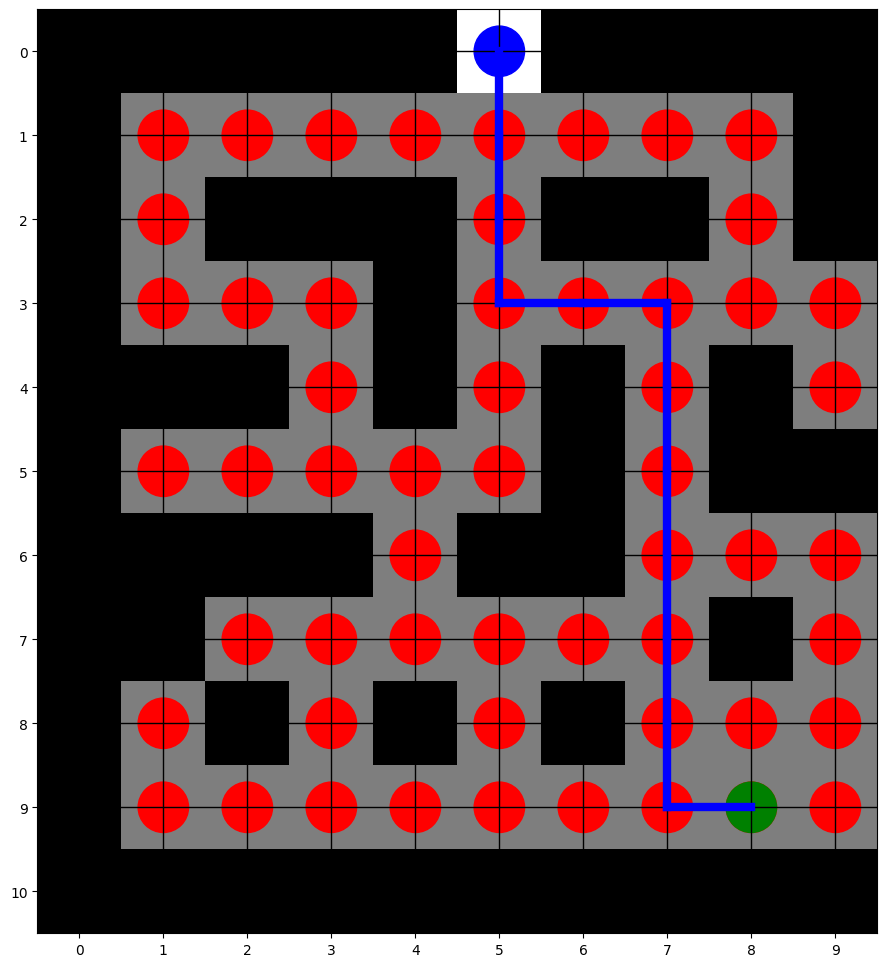

In [1]:

import numpy as np
# maze matrix
maze =  np.array([
    [-100, -100, -100, -100, -100, 100, -100, -100, -100, -100],
    [-100, -1, -1, -1, -1, -1, -1, -1, -1, -100],
    [-100, -1, -100, -100, -100, -1, -100, -100, -1, -100],
    [-100, -1, -1, -1, -100, -1, -1, -1, -1, -1],
    [-100, -100, -100, -1, -100, -1, -100, -1, -100, -1],
    [-100, -1, -1, -1, -1, -1, -100, -1, -100, -100],
    [-100, -100, -100, -100, -1, -100, -100, -1, -1, -1],
    [-100, -100, -1, -1, -1, -1, -1, -1, -100, -1],
    [-100, -1, -100, -1, -100, -1, -100, -1, -1, -1],
    [-100, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]
])
print("Maze:", maze)

maze_rows, maze_cols = maze.shape
q_values = np.zeros((maze_rows, maze_cols, 4))
actions = ["RIGHT", "LEFT", "UP", "DOWN"]

def is_obstacle(current_row, current_col):
    if maze[current_row, current_col] == -1:
        return False
    else:
        return True

def define_start():
    current_row = np.random.randint(maze_rows)
    current_col = np.random.randint(maze_cols)
    while is_obstacle(current_row, current_col):
        current_row = np.random.randint(maze_rows)
        current_col = np.random.randint(maze_cols)
    return current_row, current_col

def choose_action(current_row, current_col, epsilon):
    if np.random.random() < epsilon:
        return np.argmax(q_values[current_row, current_col])
    else:
        return np.random.randint(4)

def move(current_row, current_col, action_index):
    new_row = current_row
    new_col = current_col

    if actions[action_index] == "RIGHT" and current_col < maze_cols - 1:
        new_col += 1
    elif actions[action_index] == "LEFT" and current_col > 0:
        new_col -= 1
    elif actions[action_index] == "DOWN" and current_row < maze_rows - 1:
        new_row += 1
    elif actions[action_index] == "UP" and current_row > 0:
        new_row -= 1

    return new_row, new_col

def shortest_path(start_row, start_col):
    if is_obstacle(start_row, start_col):
        return []
    else:
        current_row = start_row
        current_col = start_col
        shortest = []
        shortest.append([current_row, current_col])
        while not is_obstacle(current_row, current_col):
            action_index = choose_action(current_row, current_col, epsilon)
            current_row, current_col = move(current_row, current_col, action_index)
            shortest.append([current_row, current_col])
        return shortest

epsilon = 0.9
discount_factor = 0.9
learning_rate = 0.9

for i in range(1000):
    row_index, col_index = define_start()
    while not is_obstacle(row_index, col_index):
        action_index = choose_action(row_index, col_index, epsilon)
        old_row, old_col = row_index, col_index
        row_index, col_index = move(row_index, col_index, action_index)
        reward = maze[row_index, col_index]
        old_q_value = q_values[old_row, old_col, action_index]
        difference = reward + (discount_factor * np.max(q_values[row_index, col_index])) - old_q_value
        new_q_value = old_q_value + (learning_rate * difference)
        q_values[old_row, old_col, action_index] = new_q_value
print("Training completed")

start_row, start_col = input("Enter the robot's starting point (e.g., 0 0): ").split()
start_row = int(start_row)
start_col = int(start_col)
shortest_route = shortest_path(start_row, start_col)
if not shortest_route:
    print("Please enter a valid starting point!")
else:
    print("Route to the exit:")
    for i in range(len(shortest_route)):
        print(shortest_route[i])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(maze, cmap='gray')
ax.set_xticks(range(maze_cols))
ax.set_yticks(range(maze_rows))
ax.grid(color='k', linestyle='-', linewidth=1)
# Add obstacles and target
for row in range(maze_rows):
    for col in range(maze_cols):
        if maze[row, col] == -1:
            ax.add_artist(plt.Circle((col, row), 0.3, color='r'))
        elif maze[row, col] == 100:
            ax.add_artist(plt.Circle((col, row), 0.3, color='b'))
# Add start point
ax.add_artist(plt.Circle((start_col, start_row), 0.3, color='g'))
for i in range(len(shortest_route) - 1):
    ax.plot([shortest_route[i][1], shortest_route[i+1][1]],
            [shortest_route[i][0], shortest_route[i+1][0]], color='b', linewidth=6)
plt.show()






